In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'food41:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1864%2F33884%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240317%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240317T181924Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D20bc134509dcec48251324c82bea38dc740a3a46ba5f05f4d64c8681dbc79a55c04890fdfee600f08c73471215d75c9bdc81704de3e3508b28608b47613f72f2333e148a690911c638b589ad1dc32c30340f9be250f7f22bda76c9350499b51cfce71550d96703907c7e583175770d9c00f41a398774674dae1203d79de2a414fbd5f533a915fb1be9ca0e5063233a726859fa7effb8274e535eba06a0ae33617a5cfd5e7afdf695ccaac9f7b7abc58dfc494242c9eb1a138a018d5a3c71716c02ce8bc02a114ec20780e34d243e6d66237c20feee08a7c6a77bfa1a66db5474111e837fc0f2ecba85d436d43c639e5bc4294e4be4ca8a795185c29fb67c8106'

KAGGLE_INPUT_PATH='content'
KAGGLE_WORKING_PATH='/kaggle/working'


!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('content', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 5693808106 bytes downloaded
Downloaded and uncompressed: food41
Data source import complete.


In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.image as mpimg
import os.path
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
image_dir =Path('/content/content/food41/images')

In [ ]:
print(image_dir)

/content/content/food41/images


In [ ]:
class_names = sorted(os.listdir(image_dir))
n_classes = len(class_names)

In [ ]:
print(f"Total Number of Classes : {n_classes} \nClass Names : {class_names}")

Total Number of Classes : 101 
Class Names : ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich',

In [ ]:
  filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

images = pd.concat([filepaths, labels], axis=1)

category_samples = []
for category in images['Label'].unique():
    category_slice = images.query("Label == @category")
    category_samples.append(category_slice.sample(100, random_state=1))
image_df = pd.concat(category_samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [ ]:
#checking how many photos are in each class - 100 as is expected
image_df['Label'].value_counts()

seaweed_salad        100
creme_brulee         100
croque_madame        100
fish_and_chips       100
beet_salad           100
                    ... 
huevos_rancheros     100
lasagna              100
grilled_salmon       100
bruschetta           100
breakfast_burrito    100
Name: Label, Length: 101, dtype: int64

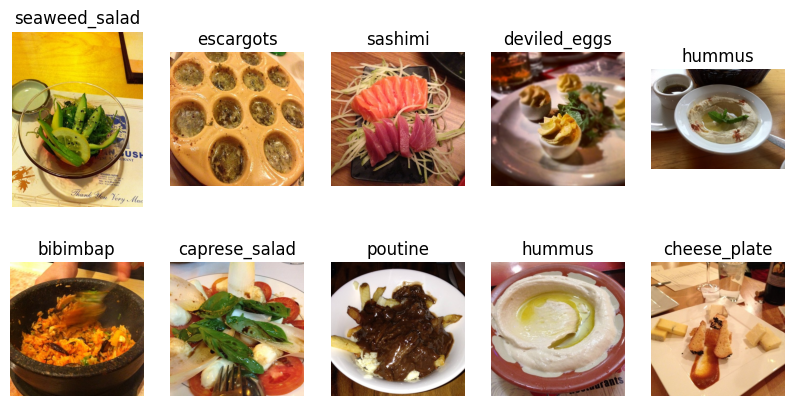

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
axs = axs.flatten()

for i in range(10):
    img_name = image_df['Filepath'].iloc[i]
    img_label = image_df['Label'].iloc[i]

    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    axs[i].imshow(img)
    axs[i].set_title(img_label)
    axs[i].axis('off')

plt.show()


In [ ]:
train_df, test_df = train_test_split(image_df, train_size=0.7, shuffle=True, random_state=1)

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
)

In [ ]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 5656 validated image filenames belonging to 101 classes.
Found 1414 validated image filenames belonging to 101 classes.
Found 3030 validated image filenames belonging to 101 classes.


In [ ]:
pretrained = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=[224,224,3], include_top=False,
    weights='imagenet'
    )

pretrained.trainable = False

model = tf.keras.models.Sequential([
    pretrained,
    tf.keras.layers.GlobalAveragePooling2D(),
    layers.Dropout(0.25),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(n_classes, activation='softmax')
])

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
#let's configure the learning process using Adam optimizer and
#look at the architecture of the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[ 'AUC']
)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                        

In [ ]:
EPOCHS = 50
BATCH_SIZE = 64
early_stop = EarlyStopping(monitor='val_loss',min_delta=0.0001, patience=5, restore_best_weights = True)
history2 = model.fit(train_images,
                    steps_per_epoch=train_images.samples // BATCH_SIZE // 2,
                    epochs=EPOCHS,
                    validation_data=val_images,
                    validation_steps= val_images.samples // BATCH_SIZE // 2,
                    verbose=1,
                    callbacks=[early_stop],
                    shuffle=True)

Epoch 1/50
44/44 [==============================] - 78s 2s/step - loss: 4.7345 - auc: 0.6045 - val_loss: 4.3301 - val_auc: 0.6786
Epoch 2/50
44/44 [==============================] - 81s 2s/step - loss: 3.9049 - auc: 0.7767 - val_loss: 3.8449 - val_auc: 0.7970
Epoch 3/50
44/44 [==============================] - 77s 2s/step - loss: 3.4692 - auc: 0.8442 - val_loss: 3.4330 - val_auc: 0.8575
Epoch 4/50
44/44 [==============================] - 79s 2s/step - loss: 3.1124 - auc: 0.8882 - val_loss: 3.1037 - val_auc: 0.8768
Epoch 5/50
44/44 [==============================] - 80s 2s/step - loss: 2.9105 - auc: 0.9064 - val_loss: 2.8510 - val_auc: 0.9025
Epoch 6/50
44/44 [==============================] - 77s 2s/step - loss: 2.7825 - auc: 0.9170 - val_loss: 2.7116 - val_auc: 0.9287
Epoch 7/50
44/44 [==============================] - 74s 2s/step - loss: 2.5759 - auc: 0.9287 - val_loss: 2.7934 - val_auc: 0.9046
Epoch 8/50
44/44 [==============================] - 68s 2s/step - loss: 2.3860 - auc: 0.94

In [ ]:
#assessing the model's performance on the test dataset
loss, auc = model.evaluate(test_images)

95/95 [==============================] - 124s 1s/step - loss: 2.4751 - auc: 0.9212


In [ ]:
#checking the available metrics
history_dict2 = history2.history

print(history_dict2.keys())

dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])


In [ ]:
def plot_train_instrumentation(epochs, data, train_param, val_param):

    plt.figure(figsize=(10,7))

    plt.plot(epochs, data[train_param], 'g', label=f'Training ({train_param})')
    plt.plot(epochs, data[val_param], 'red', label=f'Validation ({val_param})')

    plt.title("Training performance")
    plt.xlabel('Epochs')
    plt.ylabel(train_param)

    plt.legend()
    plt.show()

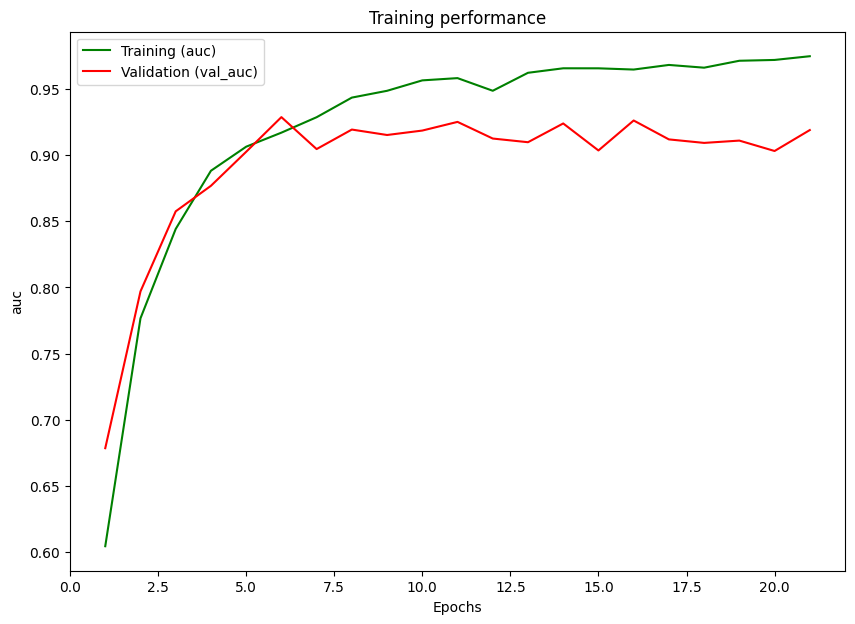

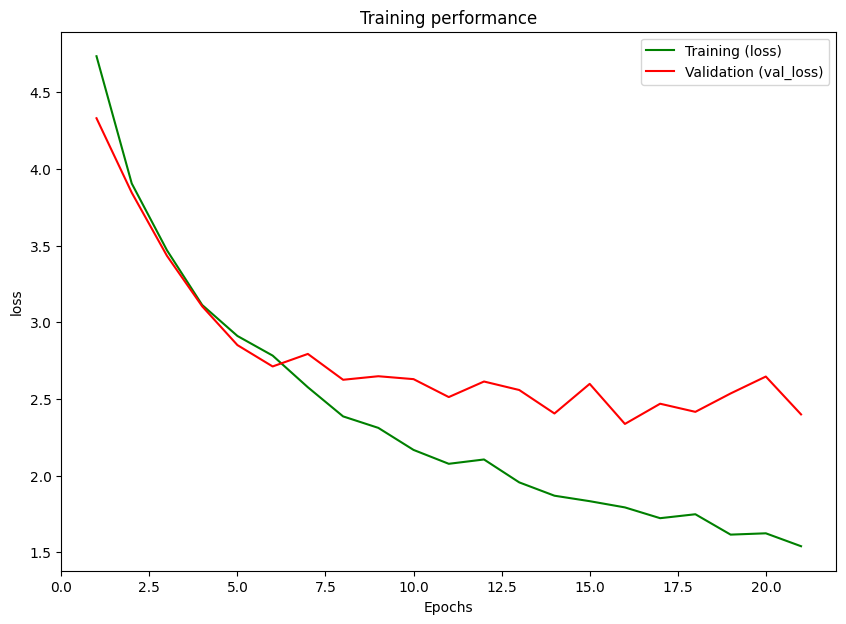

In [ ]:
#using the previously defined function to see the model's performance
#the loss functions don't converge in one point at the end
#there is a need to apply data augmentation or tune hypermarameters, but so far this is the best version we've been able to get
epochs = range(1, len(history_dict2['auc'])+1)

plot_train_instrumentation(epochs, history_dict2, 'auc', 'val_auc')
plot_train_instrumentation(epochs, history_dict2, 'loss', 'val_loss')

In [ ]:
#let's generate a classification report for the predictions made by the trained model on the test dataset
#to summarise the model's performance on each class
predictions = np.argmax(model.predict(test_images), axis=1)


report = classification_report(test_images.labels, predictions, target_names=test_images.class_indices, zero_division=0)

95/95 [==============================] - 126s 1s/step


In [ ]:
# let's look at the report
#the metrics vary between classes: the lowest F1 score is 0 for steak class and the highest is 0.97 for edamame class
print(report)

                         precision    recall  f1-score   support

              apple_pie       0.14      0.12      0.13        34
         baby_back_ribs       0.23      0.45      0.30        20
                baklava       0.27      0.52      0.35        33
         beef_carpaccio       0.33      0.28      0.30        29
           beef_tartare       0.26      0.18      0.21        28
             beet_salad       0.18      0.15      0.17        26
               beignets       0.72      0.50      0.59        26
               bibimbap       0.79      0.39      0.52        28
          bread_pudding       0.17      0.28      0.21        32
      breakfast_burrito       0.46      0.50      0.48        32
             bruschetta       0.30      0.25      0.27        28
           caesar_salad       0.32      0.46      0.38        24
                cannoli       0.52      0.38      0.44        29
          caprese_salad       0.47      0.24      0.32        38
            carrot_cake 